# <center> Ансамбли </center>

In [5]:
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

In [6]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]
dataset_names = ["Moons", "Circles", "Linearly Separable"]

data_moon = datasets[1]

X, y = data_moon

y = np.array([ -1.0 if i == 0 else float(i) for i in y])

## Задание 

# Задание 1 

In [7]:
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

def stochastic_gradient_boosting(X_train, y_train, T, subsample=0.5, learning_rate=0.1):
    l = len(y_train)
    predictions = np.zeros(l)
    models, alphas, accuracies = [], [], []
    
    for t in range(T):
        indices = np.random.choice(l, int(subsample * l), replace=False)  # случайная подвыборка
        X_subset, y_subset = X_train[indices], y_train[indices]
        
        residuals = y_subset - predictions[indices]  # вычисляем антиградиент
        model = DecisionTreeRegressor(max_depth=3)
        model.fit(X_subset, residuals)
        
        update = model.predict(X_train)
        predictions += learning_rate * update  # обновляем предсказания
        
        models.append(model)
        alphas.append(learning_rate)
        accuracies.append(accuracy_score(y_train, np.sign(predictions)))
    
    return np.sign(predictions), accuracies

In [16]:
stochastic_gradient_boosting(X, y, T=50)

(array([ 1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
         1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,
         1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,
        -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,
        -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,
         1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,
         1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
        -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.]),
 [0.8,
  0.91,
  0.9,
  0.92,
  0.92,
  0.91,
  0.92,
  0.94,
  0.93,
  0.94,
  0.94,
  0.94,
  0.94,
  0.94,
  0.94,
  0.94,
  0.94,
  0.94,
  0.94,
  0.94,
  0.93,
  0.94,
  0.94,
  0.94,
  0.95,
  0.95,
  0.95,
  0.94,
  0.94,
  0.94,
  0.95,
  0.95,
  0.95,
  0.95,
  0.95,
  0.96,
  0.96,
  0.96,
  0.96,
  0.96,
  0.96,
  0.97,
  0.99,
  0.98,
  0.99,
  0.99,
  0.99,
  0.99,
  0.99,
  0.99])

In [18]:
quality = []
for i in range(1, 25):
    accuracy = stochastic_gradient_boosting(X, y, T=i)[1]
    quality.append(accuracy[-1])

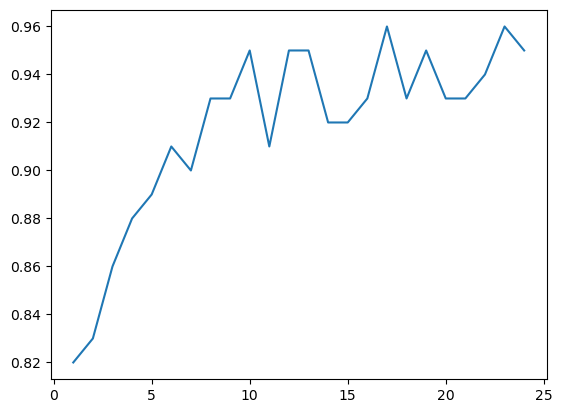

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x=list(range(1, 25)), y=quality)
plt.show()